Regular map - Complete <br/>
Animated map - Complete

2021-08-03  <br/>
Paralympic Medals  <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-08-03/readme.md

https://towardsdatascience.com/covid-19-map-animation-with-python-in-5-minutes-2d6246c32e54

In [5]:
import pandas as pd 

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-08-03/athletes.csv')
df.head()

,gender,event,medal,athlete,abb,country,grp_id,type,year,guide
0,Men,Double FITA Round Amputee,Gold,LARSEN Finn,DEN,NaN,NaN,Archery,1980,NaN
1,Men,Double FITA Round Amputee,Silver,BRENNE Manfred,FRG,NaN,NaN,Archery,1980,NaN
2,Men,Double FITA Round Amputee,Bronze,SATO Masao,JPN,NaN,NaN,Archery,1980,NaN
3,Men,Double FITA Round Paraplegic,Gold,GEISS H.,FRG,NaN,NaN,Archery,1980,NaN
4,Men,Double FITA Round Paraplegic,Silver,GRUN Guy,BEL,NaN,NaN,Archery,1980,NaN


In [7]:
df_gold_men=df[(df.gender=='Men') &( df.medal=='Gold')]

In [8]:
df_gold_men_grouped=df_gold_men.groupby(['year','abb'])['medal'].count().reset_index()



In [9]:
df_gold_men_grouped_2016=df_gold_men_grouped[df_gold_men_grouped.year==2016]

In [12]:
import plotly.io as pio
import plotly.express as px
pio.renderers.default = 'notebook'

In [16]:
#static choropleth  map
fig = px.choropleth(df_gold_men_grouped_2016,                            # Input Dataframe
                     locations="abb",           # identify country code column
                     color="medal",                     # identify representing column
                     hover_name="abb",              # identify hover name
                     projection="natural earth",        # select projection
                     color_continuous_scale = 'Peach',  # select prefer color scale
                   #  range_color=[0,50000]              # select range of dataset
                     labels={'medal':'Gold medals won in 2016'}, 
                     title="Gold medals won in 2016"

                     )        
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()             

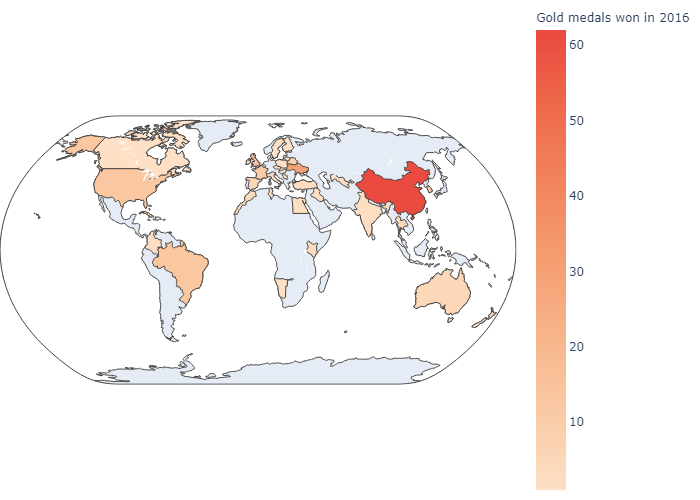

In [17]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)


In [18]:
# Animaed choropleth map
import plotly.express as px

fig = px.choropleth(df_gold_men_grouped,                            # Input Dataframe
                     locations="abb",           # identify country code column
                     color="medal",                     # identify representing column
                     hover_name="abb",              # identify hover name
                     animation_frame="year",        # identify date column
                     projection="natural earth",        # select projection
                     color_continuous_scale = 'Peach',  # select prefer color scale
                   #  range_color=[0,50000]              # select range of dataset
                     )        
fig.show()          
fig.write_html("example_map.html")                      # write the result to HTML file

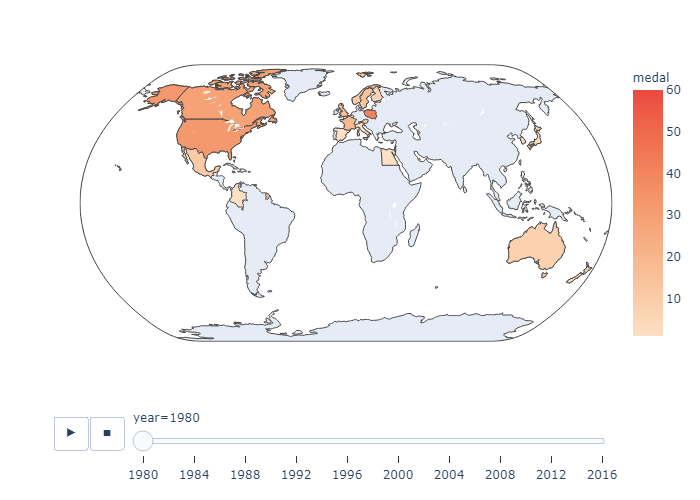

In [19]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)
